# MAT 186 Code Demo: Logistic Growth with Variable Reproduction Rate and Carrying Capacity

In [1]:
import numpy as np

import matplotlib.pyplot as plt

# this makes sure the images don't come out looking muddy on 
# retina displays (which your computer probably uses)
%config InlineBackend.figure_format='retina'

In this brief, fun demo we use Euler's method on a problem that does not admit a closed-form solution! Specifically, we look at the ODE
$$
x'(t) = r(t)x(t)\left(1-\frac{x(t)}{K(t)}\right)
$$
where $x(t)$ is the unknown and $r(t),K(t)$ are given functions of time (by default, they are periodic and in phase). Such an equation could model the effect of seasonally-varying food supply and reproductive capabilities on population growth. 

We already know how to solve this problem when $r,K$ are fixed nonnegative real numbers. When $r, K$ are allowed to vary, however, we can no longer write down a solution exactly! Thanks to Euler's method, however, we can get a good numerical approximation of the solution $x(t)$. 

In [16]:
def K(t):
    return (1.+0.3*np.cos(2.*2.*np.pi*t))/(1.3)
def r(t):
    return (1.+0.9*np.cos(2.*np.pi*t))/(4.)
def f(t,x):
    return r(t)*x*(1.-x/K(t))

In [29]:
T = 30. # total simulation runtime
dt = 1e-2 # time-step
n= int(T/dt) # total number of time samples

x0 = 0.4 # initial state

x =np.zeros(n, dtype=float) # array for storing solution samples. 
x[0]=x0

In [33]:
# do the time-stepping
for n in np.arange(1,n):
    x[n]= x[n-1] + dt*f(n*dt, x[n-1])

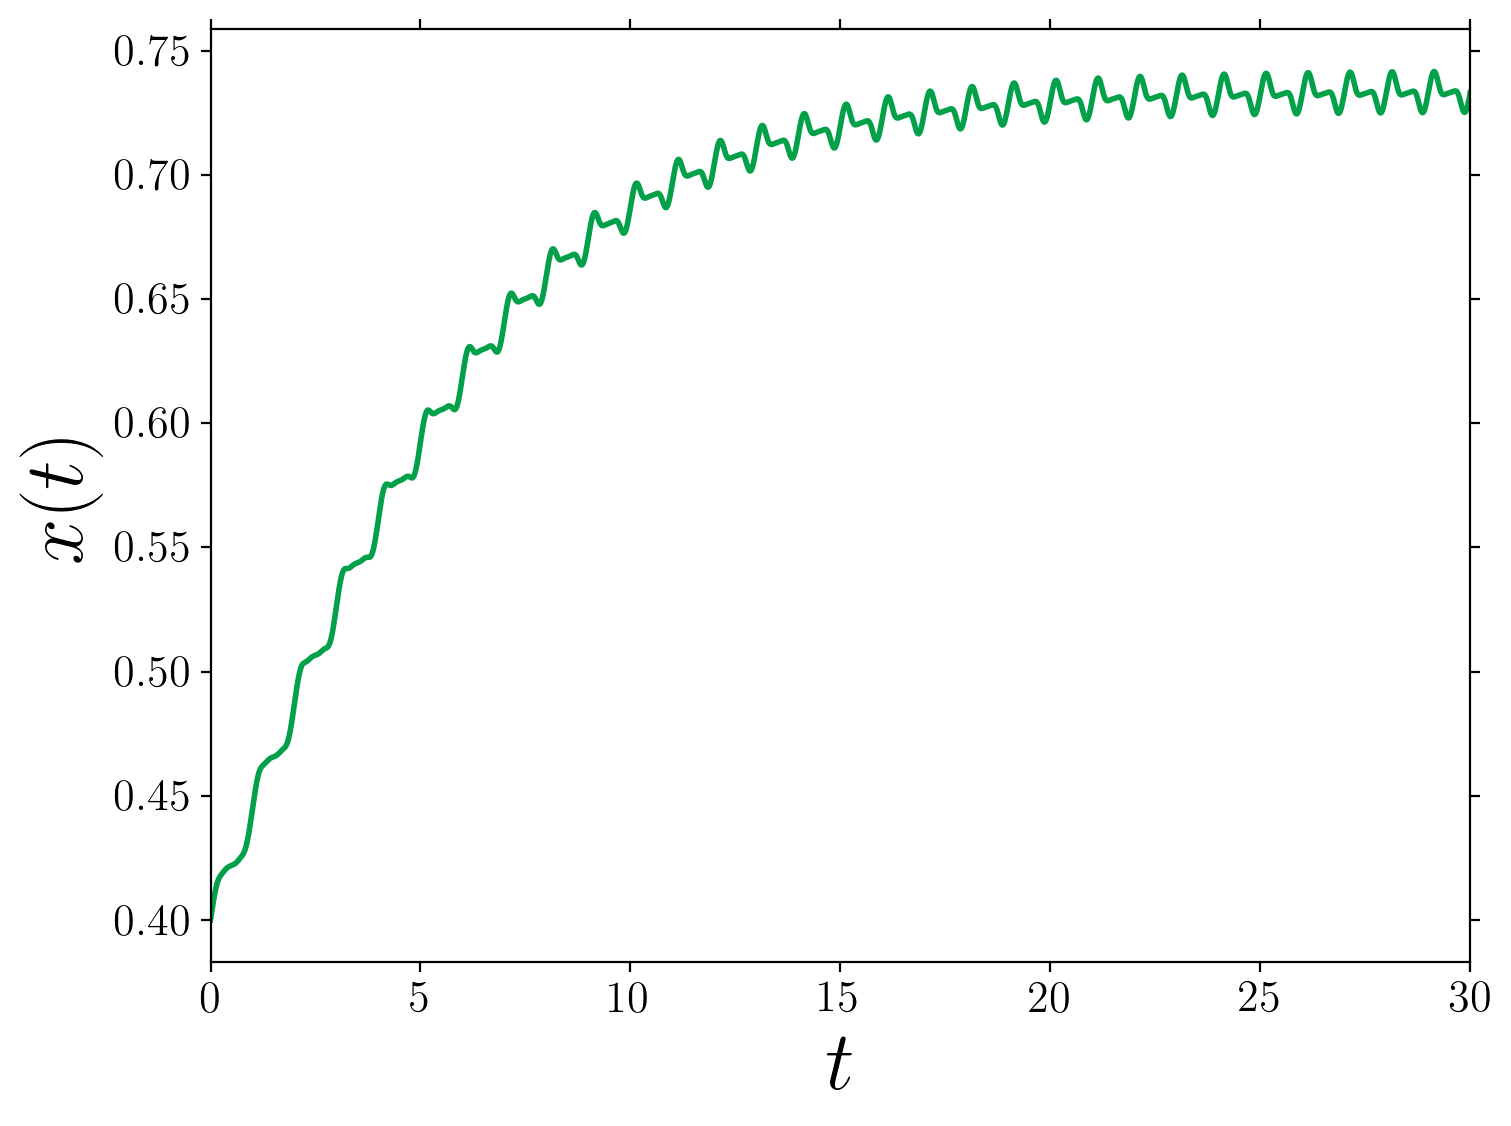

In [32]:
# Plot solution
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, ax =plt.subplots()

tt=np.linspace(0,T,n+1, endpoint=True)

plt.plot(tt, x, linewidth=2, color='xkcd:emerald')

plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
plt.rcParams["axes.edgecolor"] = 'k'

plt.xlim([0,T])
#plt.ylim([0.9*y0, 1.1*x0])

plt.xlabel(r"$t$", fontsize=30, color = 'k')
plt.ylabel(r"$x(t)$", fontsize=30, color = 'k')

plt.tick_params(axis='x', which='both', top='off', color = 'k')
plt.xticks(fontsize=16, rotation=0, color = 'k')
plt.tick_params(axis='y', which='both', right='off', color = 'k')
plt.yticks(fontsize=16, rotation=0, color = 'k')

plt.tight_layout()

fig.set_size_inches(8, 6)
plt.savefig('non_auto_logistic' + '.jpg', dpi=700)

#"""
plt.show()

Anyone who says they could guess the fine details of this shape without a numerical method is lying!

You should run the code with successively smaller $\Delta t$ to convince yourself the output is correct.